# Mean/Median/Mode Imputation

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('titanic.csv', usecols=["Age","Fare","Survived"])
df

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
...,...,...,...
886,0,27.0,13.0000
887,1,19.0,30.0000
888,0,NaN,23.4500
889,1,26.0,30.0000


In [3]:
#Lets see the percentage of missing values
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [4]:
def impute_median(df,variable,median):    # For median imputation
    df[variable+"_median"]=df[variable].fillna(median)
# With this function a new feature is created with nan values filled with median 

In [5]:
def impute_mean(df,variable,mean):    # For mean imputation
    df[variable+"_mean"]=df[variable].fillna(mean)
# With this function a new feature is created with nan values filled with mean

In [22]:
def impute_mode(df,variable,mode):    # For mode imputation
    df[variable+"_mode"]=df[variable].fillna(mode)
# With this function a new feature is created with nan values filled with mode

In [7]:
median= df.Age.median()
median

28.0

In [28]:
mode = df.Age.mode()[0]
mode

24.0

In [8]:
mean= df.Age.mean()
mean

29.69911764705882

In [9]:
impute_median(df,'Age',median)
df

,Survived,Age,Fare,Age_median
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0
...,...,...,...,...
886,0,27.0,13.0000,27.0
887,1,19.0,30.0000,19.0
888,0,NaN,23.4500,28.0
889,1,26.0,30.0000,26.0


In [10]:
impute_mean(df,'Age',mean)
df

,Survived,Age,Fare,Age_median,Age_mean
0,0,22.0,7.2500,22.0,22.000000
1,1,38.0,71.2833,38.0,38.000000
2,1,26.0,7.9250,26.0,26.000000
3,1,35.0,53.1000,35.0,35.000000
4,0,35.0,8.0500,35.0,35.000000
...,...,...,...,...,...
886,0,27.0,13.0000,27.0,27.000000
887,1,19.0,30.0000,19.0,19.000000
888,0,NaN,23.4500,28.0,29.699118
889,1,26.0,30.0000,26.0,26.000000


In [29]:
impute_mode(df,'Age',mode)
df

,Survived,Age,Fare,Age_median,Age_mean,Age_mode
0,0,22.0,7.2500,22.0,22.000000,22.0
1,1,38.0,71.2833,38.0,38.000000,38.0
2,1,26.0,7.9250,26.0,26.000000,26.0
3,1,35.0,53.1000,35.0,35.000000,35.0
4,0,35.0,8.0500,35.0,35.000000,35.0
...,...,...,...,...,...,...
886,0,27.0,13.0000,27.0,27.000000,27.0
887,1,19.0,30.0000,19.0,19.000000,19.0
888,0,NaN,23.4500,28.0,29.699118,24.0
889,1,26.0,30.0000,26.0,26.000000,26.0


In [12]:
print(df['Age'].std())

14.526497332334044


In [13]:
print(df['Age_median'].std())

13.019696550973194


In [30]:
print(df['Age_mode'].std())

13.199571767746487


In [31]:
print(df['Age_mean'].std())

13.002015226002884


Text(0.5, 1.0, 'AGE VS AGE_MEDIAN')

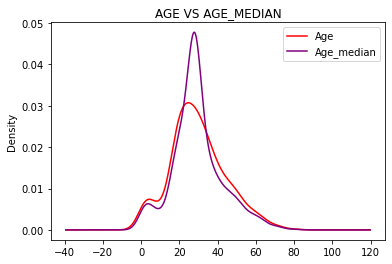

In [14]:
fig=plt.figure()
ax=fig.add_subplot(111)
df['Age'].plot(kind='kde',ax=ax,color='red')
df.Age_median.plot(kind='kde',ax=ax,color='purple')
ax.legend(loc='best')
plt.title('AGE VS AGE_MEDIAN')

Text(0.5, 1.0, 'AGE VS AGE_MEDIAN VS AGE_MEAN VS AGE_MODE')

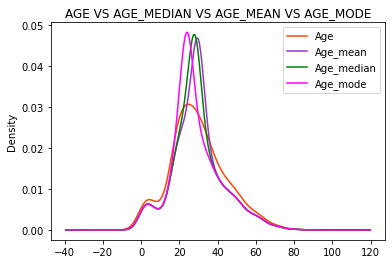

In [32]:
fig=plt.figure()
ax=fig.add_subplot(111)
df['Age'].plot(kind='kde',ax=ax,color='orangered')
df.Age_mean.plot(kind='kde',ax=ax,color='darkorchid')
df.Age_median.plot(kind='kde',ax=ax,color='green')
df.Age_mode.plot(kind='kde',ax=ax,color='magenta')
# lines,labels=ax.get_legend_handles_labels()
# ax.legend(lines,labels,loc='best')
ax.legend(loc='best')
plt.title('AGE VS AGE_MEDIAN VS AGE_MEAN VS AGE_MODE')

### Advantages
1.Easy To Implement (Robust to outliers).<br>
2.Faster Way To Obtain The Complete Dataset.

### Disadvantages
1.Change Or Distortion in the original Variance.<br>
2.Impacts Correlation.

You can use this method when data is missing completely at random, and no more than 5% of the variable contains missing data.